In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
choice = 0  #start from 0
devices = ['nfet_01v8_lvt', 'nfet_01v8', 'pfet_01v8_lvt', 'pfet_01v8']

# widths used for characterization
w = np.array([5.0, 5.0, 5.0, 5.0])

In [72]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
fet_name = par_names[1].split('[')[0]

# remove unwanted columns and rename for readability
df = df_raw.drop(['frequency', 'frequency.1'], axis=1)
df = df.apply(pd.to_numeric)
df.columns = df.columns.str.replace(fet_name, '')
df.columns = df.columns.str.replace(fet_name[1:], '')
df.columns = df.columns.str.replace('[dc]', '')
df.columns = df.columns.str.replace('onoise..', 'n')
df.columns = df.columns.str.removeprefix('@')
df.columns = df.columns.str.removeprefix('[')
df.columns = df.columns.str.removesuffix(']')
df

,capbd,capbs,cdd,cgb,cgd,cgdo,cgg,cgs,cgso,css,...,gm,gmbs,id,l,vth,vb,vd,vg,n1overf,nid
0,2.821000e-15,2.821000e-15,4.190000e-16,-1.460000e-15,-3.334000e-16,1.284000e-15,1.619000e-15,1.744000e-16,1.284000e-15,-8.537000e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e-07,0.6197,0.0,0.000,0.0,0.000000e+00,2.389000e-16
1,2.509000e-15,2.509000e-15,3.248000e-16,-1.327000e-15,-2.635000e-16,1.284000e-15,1.448000e-15,1.426000e-16,1.284000e-15,-7.198000e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e-07,0.6478,-0.2,0.000,0.0,0.000000e+00,8.181000e-17
2,2.285000e-15,2.285000e-15,2.656000e-16,-1.223000e-15,-2.196000e-16,1.284000e-15,1.321000e-15,1.214000e-16,1.284000e-15,-6.177000e-17,...,3.922000e-35,5.440000e-36,0.000000e+00,1.500000e-07,0.6709,-0.4,0.000,0.0,0.000000e+00,3.561000e-17
3,2.775000e-15,2.821000e-15,7.575000e-17,-1.466000e-15,-5.426000e-17,1.282000e-15,1.596000e-15,-7.605000e-17,1.284000e-15,7.673000e-17,...,2.992000e-11,6.991000e-12,1.162000e-12,1.500000e-07,0.6185,0.0,0.025,0.0,1.576000e-16,2.618000e-16
4,2.477000e-15,2.509000e-15,5.559000e-17,-1.330000e-15,-4.025000e-17,1.282000e-15,1.430000e-15,-5.962000e-17,1.284000e-15,5.604000e-17,...,1.061000e-11,1.877000e-12,4.013000e-13,1.500000e-07,0.6464,-0.2,0.025,0.0,5.429000e-17,9.001000e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255787,1.527000e-15,2.497000e-15,9.651000e-17,2.932000e-15,-8.150000e-17,1.287000e-15,8.946000e-14,-9.231000e-14,1.298000e-15,5.469000e-14,...,4.466000e-04,9.257000e-05,3.308000e-04,3.000000e-06,0.4891,-0.2,1.775,1.8,2.643000e-08,4.017000e-12
255788,1.479000e-15,2.277000e-15,9.763000e-17,2.079000e-15,-8.574000e-17,1.287000e-15,8.833000e-14,-9.032000e-14,1.298000e-15,5.381000e-14,...,4.282000e-04,7.672000e-05,3.142000e-04,3.000000e-06,0.5251,-0.4,1.775,1.8,2.522000e-08,3.808000e-12
255789,1.574000e-15,2.803000e-15,8.704000e-17,4.224000e-15,-7.012000e-17,1.285000e-15,9.074000e-14,-9.490000e-14,1.298000e-15,5.585000e-14,...,4.726000e-04,1.168000e-04,3.514000e-04,3.000000e-06,0.4489,0.0,1.800,1.8,2.788000e-08,4.331000e-12
255790,1.521000e-15,2.497000e-15,8.904000e-17,2.932000e-15,-7.518000e-17,1.285000e-15,8.945000e-14,-9.231000e-14,1.298000e-15,5.469000e-14,...,4.469000e-04,9.262000e-05,3.309000e-04,3.000000e-06,0.4891,-0.2,1.800,1.8,2.644000e-08,4.019000e-12


In [73]:
# sweep variable vectors
l =   np.unique(df['l'])
vgs = np.unique(df['vg'])
vds = np.unique(df['vd'])
vsb = np.unique(-df['vb'])

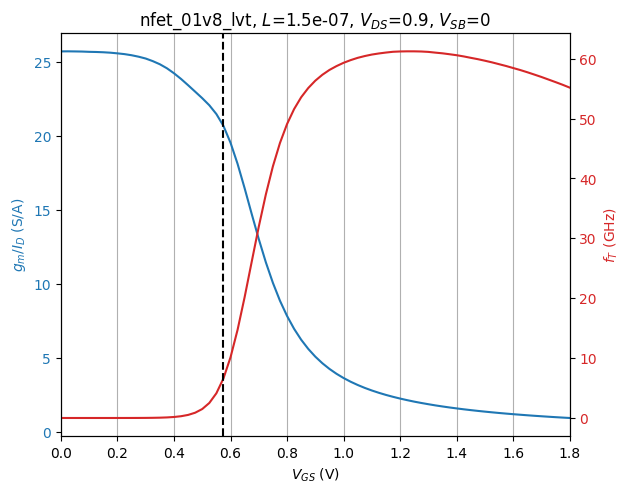

In [74]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.9; VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['vd'] == VDS1)& (df['vb'] == -VSB1)]
gm_id1 = df1['gm'].values/df1['id'].values
cgg1 = df1['cgg'].values + df1['cgdo'].values + df1['cgso'].values
ft1 = df1['gm'].values/cgg1/2/np.pi

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 1.8)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

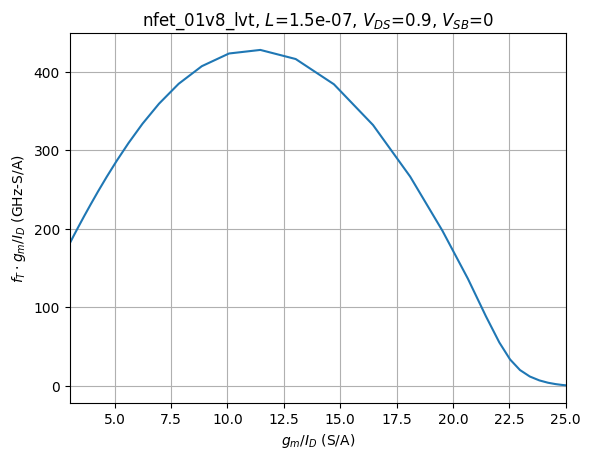

In [75]:
# plot product of gm/ID and fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

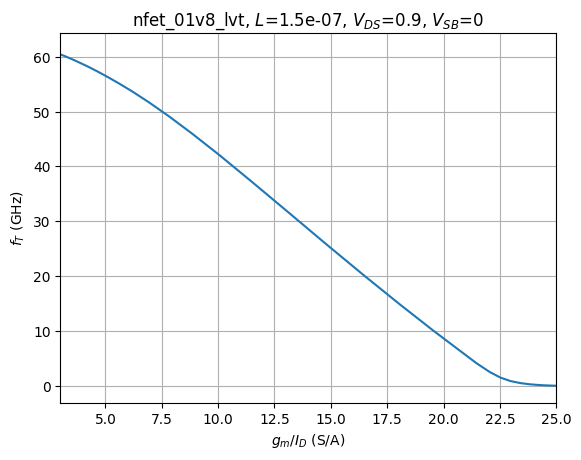

In [76]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

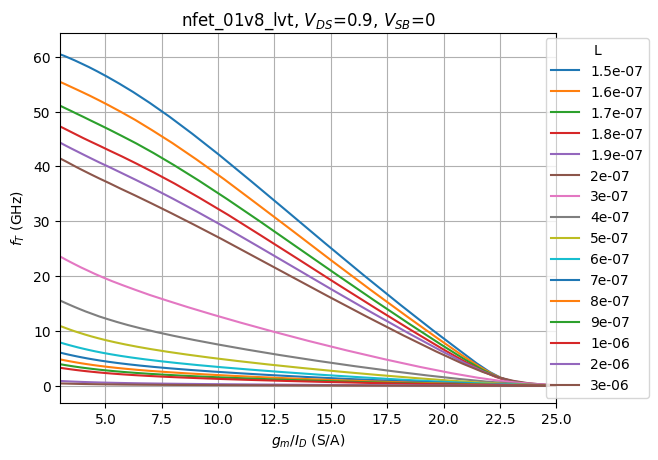

In [77]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
df2 = df.loc[ (df['vd'] == VDS2) & (df['vb'] == -VSB2)]
gm_id2 = df2['gm'].values/df2['id'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
cgg2 = df2['cgg'].values + df2['cgdo'].values + df2['cgso'].values
ft2 = df2['gm'].values/cgg2/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

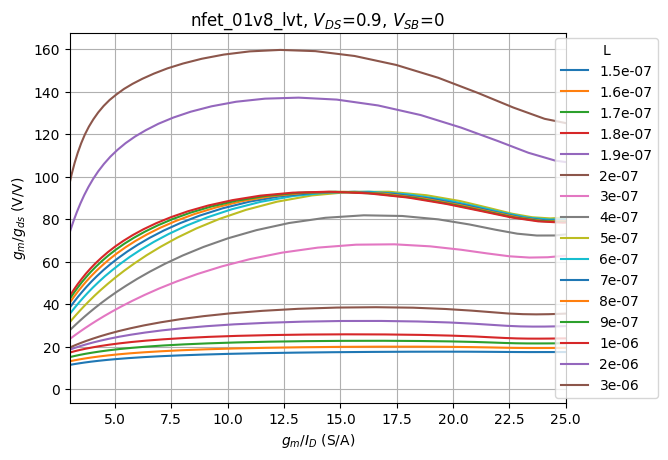

In [78]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

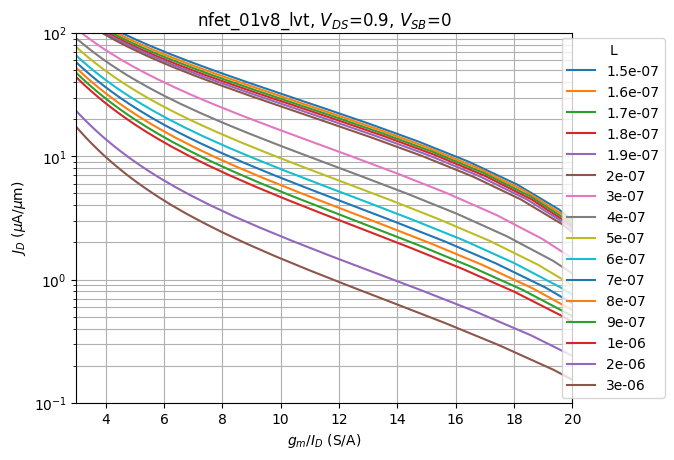

In [79]:
# plot jd versus gm/ID for all L
jd2 = df2['id'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

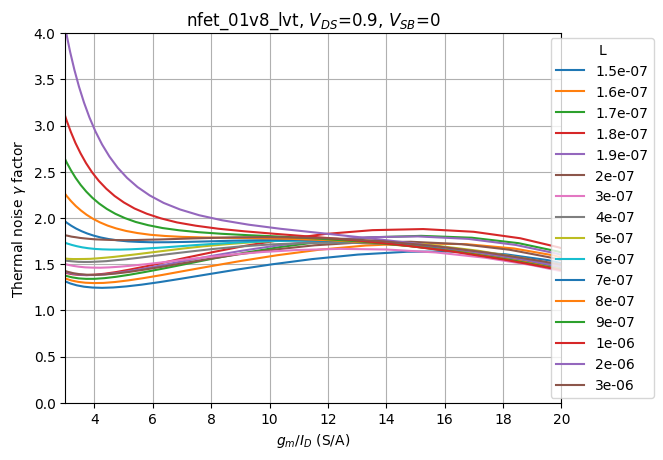

In [80]:
# plot gamma versus gm/ID for all L
gamma = df2['nid'].values**2 / df2['gm'].values/4/300/1.38e-23
gamma = np.reshape(gamma, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gamma)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0, 4)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

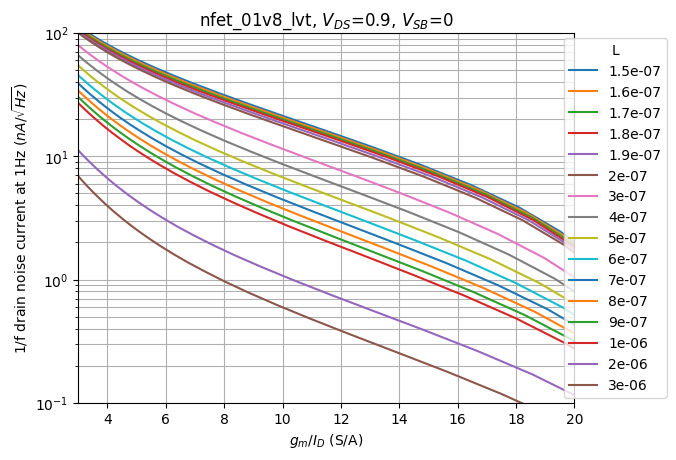

In [81]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
n1overf = df2['n1overf'].values
n1overf = np.reshape(n1overf, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 100)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

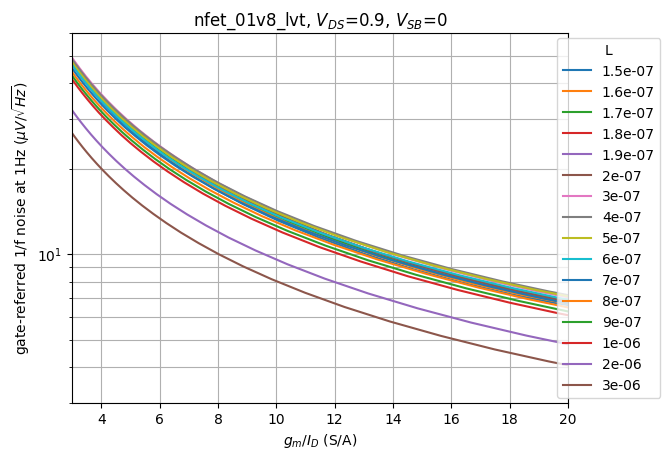

In [82]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
n1overf_gate = df2['n1overf'].values / df2['gm'].values
n1overf_gate = np.reshape(n1overf_gate, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf_gate/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(3, 60)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()